<a href="https://colab.research.google.com/github/erdikose/EC_48E/blob/main/EC_48E_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC 48E Assignment 1

---

## Part A. Data Analysis of Financial Time Series

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.

In [16]:
stocks_dict={"Google": "googl", "Apple": "aapl", "Amazon": "amzn", "NVIDIA": "nvda", "Bitcoin": "btc-usd", "NASDAQ": "^ixic",
             "BIST100": "xu100.is", "Akbank": "akbnk.is", "Tüpraş": "tuprs.is"}
start = "2013-01-01"
end = "2024-01-01"
# In Yahoo Finance, no correction was made for the dates before 2 zeros were removed from the BIST 100 index.
# So I manually set the index by dividing the index by 100 before the following date:
bist_adj = "2020-07-25"

In [17]:
# creating empty data frames with time index
idx = pd.DatetimeIndex(pd.date_range(start,end,freq="D",inclusive="left"))

daily_data = pd.DataFrame(index=idx)
daily_ret = pd.DataFrame(index=idx)
weekly_ret = pd.DataFrame(index=idx)
monthly_ret = pd.DataFrame(index=idx)
# This for loop will save the daily prices and returns for different time horizons.
# I multiplied percentage change values by 100 for easiness.
# data, weekly data and monthly data in the loop are temporary.
for stock in stocks_dict:
  if stock == "BIST100":
    bist1 = yf.download("xu100.is", start, bist_adj, interval="1d", group_by="ticker")["Close"]/100
    bist2 = yf.download("xu100.is", bist_adj, end, interval="1d", group_by="ticker")["Close"]
    data = pd.concat([bist1, bist2])
  else:
    data = yf.download(stocks_dict[stock], start, end, interval="1d", group_by="ticker")["Close"]
  daily_data[stock] = data
  daily_ret[stock] = data.pct_change()*100
  weekly_data = data.resample("w").last()
  weekly_ret[stock] = weekly_data.pct_change()*100
  monthly_data= data.resample("m").last()
  monthly_ret[stock] = monthly_data.pct_change()*100
# removing all-na rows
daily_ret.dropna(how="all", inplace=True)
weekly_ret.dropna(how="all", inplace=True)
monthly_ret.dropna(how="all", inplace=True)

print("\nDaily returns (%) for the last 20 days of 2023:")
daily_ret.tail(20)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Daily returns (%) for the last 20 days of 2023:


,Google,Apple,Amazon,NVIDIA,Bitcoin,NASDAQ,BIST100,Akbank,Tüpraş
2023-12-12,-0.577680,0.792015,1.089860,2.209025,0.500416,0.699187,0.265255,6.704871,-1.209679
2023-12-13,0.037732,1.669149,0.922159,0.904379,3.475300,1.379991,-2.833952,-1.235239,-1.972785
2023-12-14,-0.475224,0.075770,-0.954043,0.544833,0.310628,0.187320,3.773261,4.241439,5.274109
2023-12-15,0.500230,-0.272572,1.729754,1.116855,-2.543268,0.354707,2.310134,1.982260,-0.329598
2023-12-16,NaN,NaN,NaN,NaN,0.740189,NaN,NaN,NaN,NaN
2023-12-17,NaN,NaN,NaN,NaN,-2.072563,NaN,NaN,NaN,NaN
2023-12-18,2.413271,-0.850336,2.733884,2.427898,3.043358,0.613542,-2.545691,0.767271,-3.240737
2023-12-19,0.625914,0.536017,-0.181745,-0.944542,-0.828208,0.660258,-0.827942,-1.319798,0.683527
2023-12-20,1.236738,-1.071393,-1.085895,-3.009843,3.268761,-1.501540,-0.815439,2.726331,1.629324
2023-12-21,1.503543,-0.076995,1.130687,1.827027,0.496887,1.258157,1.332395,-2.103155,1.870410


### 2.

In [18]:
def moments(series):
  df = pd.DataFrame(series)
  return pd.DataFrame({"mean": np.mean(df,axis=0),
                       "std. deviation": np.std(df),
                       "skewness": df.apply(skew, nan_policy="omit"),
                       "excess kurtosis": df.apply(kurtosis, nan_policy="omit")}).T

# kurtosis function from scipy.stats calculates excess kurtosis (fisher definition, K-3)

In [19]:
print("Daily return statistics:")
print(moments(daily_ret))
print("\nWeekly return statistics:")
print(moments(weekly_ret))
print("\nMonthly return statistics:")
moments(monthly_ret)

Daily return statistics:
                   Google     Apple    Amazon     NVIDIA   Bitcoin    NASDAQ  \
mean             0.088697  0.098612  0.110353   0.221784  0.202516  0.065152   
std. deviation   1.724874  1.788330  2.056396   2.814356  3.697699  1.283420   
skewness         0.407941 -0.137879  0.255655   0.709700 -0.139192 -0.468017   
excess kurtosis  8.078622  5.832756  6.388850  10.537108  7.566153  8.171941   

                  BIST100    Akbank    Tüpraş  
mean             0.094102  0.086023  0.130601  
std. deviation   1.592945  2.463739  2.262842  
skewness        -0.513490  0.341217  0.159052  
excess kurtosis  4.652442  3.452221  4.202676  

Weekly return statistics:
                   Google     Apple    Amazon    NVIDIA   Bitcoin    NASDAQ  \
mean             0.420754  0.478107  0.517887  1.043272  1.463712  0.308979   
std. deviation   3.694188  3.775854  4.186666  5.792913  9.978849  2.579017   
skewness         0.746267 -0.174738  0.074401  0.479371  0.138883 -0.3

,Google,Apple,Amazon,NVIDIA,Bitcoin,NASDAQ,BIST100,Akbank,Tüpraş
mean,1.760879,2.212758,2.260043,4.724794,6.533423,1.327325,2.028575,1.787283,2.884930
std. deviation,6.726756,7.889807,8.853799,12.532748,21.921860,5.026329,7.868618,11.077279,10.730689
skewness,0.103246,-0.134972,0.265485,0.009099,0.497790,-0.297225,0.592676,0.630761,0.544294
excess kurtosis,0.329252,-0.456788,0.626023,0.540404,0.127381,0.405199,0.513574,0.613328,0.638993


### 3.

In [20]:
stats_table = pd.concat([moments(daily_ret),moments(weekly_ret),moments(monthly_ret)],
                        keys=["daily", "weekly","monthly"])
stats_table

Google     Apple    Amazon     NVIDIA    Bitcoin  \
daily   mean             0.088697  0.098612  0.110353   0.221784   0.202516   
        std. deviation   1.724874  1.788330  2.056396   2.814356   3.697699   
        skewness         0.407941 -0.137879  0.255655   0.709700  -0.139192   
        excess kurtosis  8.078622  5.832756  6.388850  10.537108   7.566153   
weekly  mean             0.420754  0.478107  0.517887   1.043272   1.463712   
        std. deviation   3.694188  3.775854  4.186666   5.792913   9.978849   
        skewness         0.746267 -0.174738  0.074401   0.479371   0.138883   
        excess kurtosis  4.747514  1.762332  1.720924   2.289308   1.392461   
monthly mean             1.760879  2.212758  2.260043   4.724794   6.533423   
        std. deviation   6.726756  7.889807  8.853799  12.532748  21.921860   
        skewness         0.103246 -0.134972  0.265485   0.009099   0.497790   
        excess kurtosis  0.329252 -0.456788  0.626023   0.540404   0.127381   

                           NASDAQ   BIST100     Akbank     Tüpraş  
daily   mean             0.065152  0.094102   0.086023   0.130601  
        std. deviation   1.283420  1.592945   2.463739   2.262842  
        skewness        -0.468017 -0.513490   0.341217   0.159052  
        excess kurtosis  8.171941  4.652442   3.452221   4.202676  
weekly  mean             0.308979  0.454807   0.441873   0.649404  
        std. deviation   2.579017  3.550127   5.848427   5.187626  
        skewness        -0.342260 -0.217107   0.295394   0.398774  
        excess kurtosis  2.453490  1.150572   2.849718   2.831192  
monthly mean             1.327325  2.028575   1.787283   2.884930  
        std. deviation   5.026329  7.868618  11.077279  10.730689  
        skewness        -0.297225  0.592676   0.630761   0.544294  
        excess kurtosis  0.405199  0.513574   0.613328   0.638993

*   Mean represents expected returns. Bitcoin has the highest expected return compared to the others in weekly and monthly data, but in daily data NVIDIA has the highest expected return. (Note that cryptocurrency market is open 7 days in a week.)
*   Standard deviation is associated with risk/volatility: While Bitcoin has higher expected returns, its volatility is too high which means return distribution lies in a broader way.
* Skewness is about symmetry of the returns. Negative skewness indicates a higher likelihood of losses than gains. NASDAQ and Apple has negative skewness for all three frequencies.
* Excess kurtosis is about tail risk and the higher the excess kurtosis the higher the fat tail risk. It can also be interpreted as large gains are more common, but in a conservative way, also large losses are more prevelant. As investment horizon expands, Turkish stocks have higher excess kurtosis then higher fat tail risk. On a daily basis, kurtosis is higher in US stocks and index.



In [21]:
us_stocks, tr_stocks = (["Google", "Apple", "Amazon","NVIDIA"], ["Akbank", "Tüpraş"])
daily_melt = pd.melt(daily_data, var_name="Stock", ignore_index=False).reset_index() # long format of the daily data

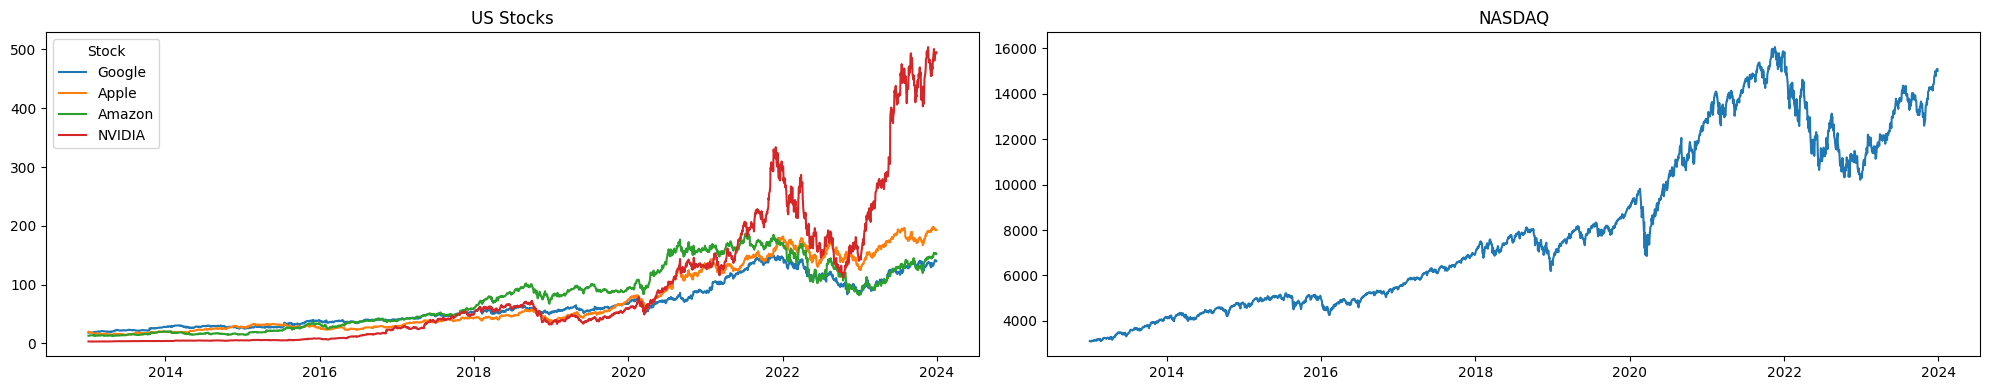

In [22]:
# Since the magnitudes of market indexes made the other series unreadable, I plotted the graphs side by side instead of a single graph.
fig, axes = plt.subplots(1,2,figsize=(20,4))
plt.subplot(121)
sns.lineplot(data=daily_melt[daily_melt["Stock"].isin(us_stocks)],x="index",y="value",hue="Stock")
plt.xlabel("")
plt.ylabel("")
plt.title("US Stocks", fontsize=12)
plt.subplot(122)
sns.lineplot(data=daily_melt[daily_melt["Stock"]=="NASDAQ"],x="index",y="value")
plt.xlabel("")
plt.ylabel("")
plt.title("NASDAQ", fontsize=12)
plt.tight_layout()

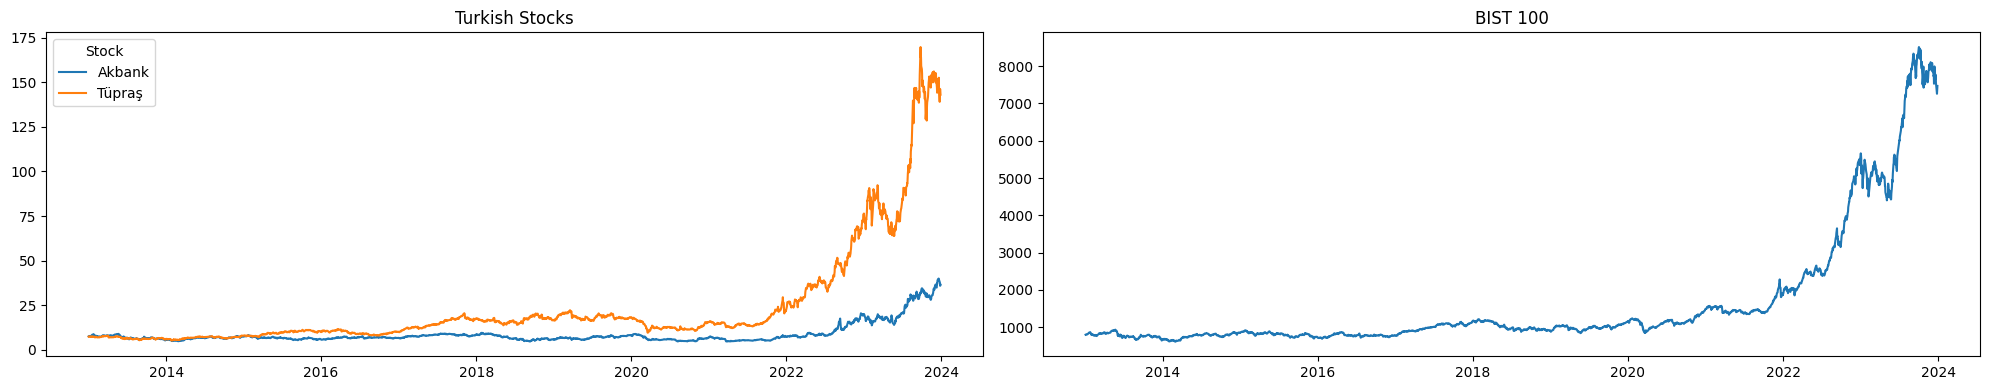

In [23]:
fig, axes = plt.subplots(1,2,figsize=(20,4))
plt.subplot(121)
sns.lineplot(data=daily_melt[daily_melt["Stock"].isin(tr_stocks)],x="index",y="value",hue="Stock")
plt.xlabel("")
plt.ylabel("")
plt.title("Turkish Stocks", fontsize=12)
plt.subplot(122)
sns.lineplot(data=daily_melt[daily_melt["Stock"]=="BIST100"],x="index",y="value")
plt.xlabel("")
plt.ylabel("")
plt.title("BIST 100", fontsize=12)
plt.tight_layout()

Stock prices and market indexes go hand in hand for both countries. They follow similar patterns in terms of ups and downs but NVIDIA, which performs sharp swings, is by far **more volatile** than the US stocks and its market index, NASDAQ and tend to overshoot/undershoot respective to the NASDAQ index.

### 4.

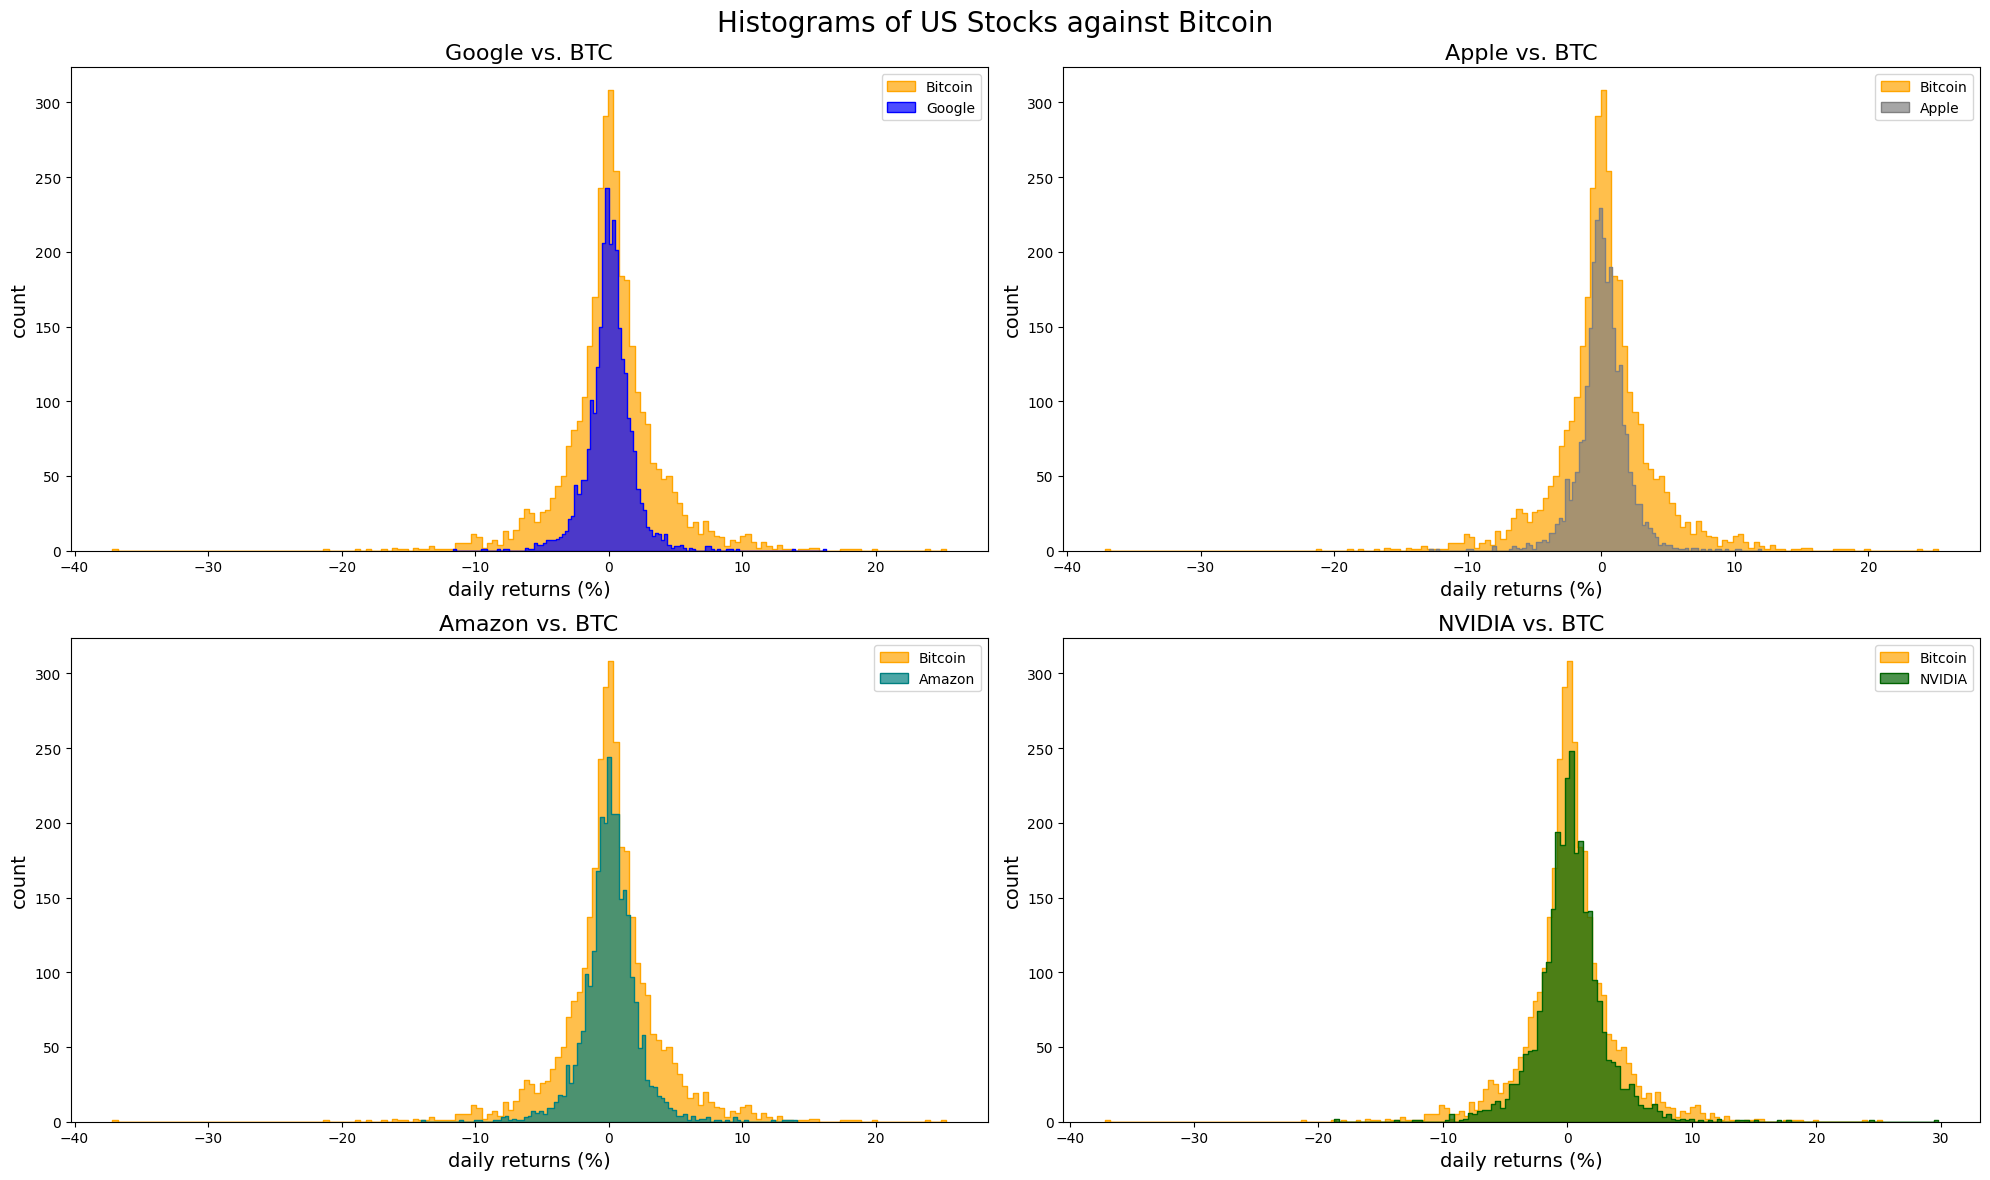

In [24]:
# note that the number of observations for Bitcoin is greater than the other assets'. stat="percent" arg might be used.
fig, axes = plt.subplots(2,2,figsize=(20,12))
fig_no=1
palette=["blue", "gray", "teal", "darkgreen"]
for stock in us_stocks:
  plt.subplot(2,2,fig_no)
  sns.histplot(daily_ret["Bitcoin"], color="orange", alpha=.7, label="Bitcoin", element="step")
  sns.histplot(daily_ret[stock], color=palette[fig_no-1], alpha =.7, label=stock, element="step")
  plt.xlabel("daily returns (%)", fontsize=14)
  plt.ylabel("count", fontsize=14)
  plt.title(f"{stock} vs. BTC", fontsize=16)
  plt.legend(loc='upper right')
  fig_no+=1
plt.suptitle("Histograms of US Stocks against Bitcoin", fontsize=20)
plt.tight_layout()

While the US stocks have similar daily return distribution, Bitcoin has a much broader return range. Bitcoin has highest standard deviation, hence volatility, therefore return range of Bitcoin expanded for both sides. Higher volatility may get higher returns but also higher loss. In terms of expected return and risk, Turkish stocks has also similar daily return distribution to (from the stats_table above) the US stocks if we compared them to Bitcoin.

## Part B. Correlation and Regression

### 1.

In [25]:
us_assets = ["Google", "Apple", "Amazon", "NVIDIA", "Bitcoin", "NASDAQ"]
daily_ret[us_assets].corr()
# the line above will yield a fine correlation matrix but there is no p-values.

,Google,Apple,Amazon,NVIDIA,Bitcoin,NASDAQ
Google,1.000000,0.564560,0.625980,0.534668,0.170949,0.778050
Apple,0.564560,1.000000,0.498861,0.526964,0.173302,0.766889
Amazon,0.625980,0.498861,1.000000,0.492069,0.149782,0.710271
NVIDIA,0.534668,0.526964,0.492069,1.000000,0.188457,0.717236
Bitcoin,0.170949,0.173302,0.149782,0.188457,1.000000,0.233570
NASDAQ,0.778050,0.766889,0.710271,0.717236,0.233570,1.000000


In [26]:
# We might want to see the p-values along with correlation coefficients (better safe than sorry)
# here is the correlation matrix with significance levels:
def corr_matrix(df):
  col_names = list(df.columns)
  corr_mat = pd.DataFrame(columns = col_names, index=pd.MultiIndex.from_product([col_names,["pearson r", "p-value"]]))
  for row in col_names:
    for col in col_names:
      tmp = df[df[row].notnull() & df[col].notnull()]
      rp = [round(i,3) for i in pearsonr(tmp[row], tmp[col])]
      corr_mat[row][col] = [rp[0], "("+str(rp[1])+")"]
  return corr_mat

In [27]:
print("-------------- Daily return correlation matrix --------------")
print(corr_matrix(daily_ret[us_assets]))
print("-------------- Weekly return correlation matrix --------------")
print(corr_matrix(weekly_ret[us_assets]))
print("-------------- Monthly return correlation matrix --------------")
corr_matrix(monthly_ret[us_assets])

-------------- Daily return correlation matrix --------------
                  Google  Apple Amazon NVIDIA Bitcoin NASDAQ
Google  pearson r    1.0  0.565  0.626  0.535   0.171  0.778
        p-value    (0.0)  (0.0)  (0.0)  (0.0)   (0.0)  (0.0)
Apple   pearson r  0.565    1.0  0.499  0.527   0.173  0.767
        p-value    (0.0)  (0.0)  (0.0)  (0.0)   (0.0)  (0.0)
Amazon  pearson r  0.626  0.499    1.0  0.492    0.15   0.71
        p-value    (0.0)  (0.0)  (0.0)  (0.0)   (0.0)  (0.0)
NVIDIA  pearson r  0.535  0.527  0.492    1.0   0.188  0.717
        p-value    (0.0)  (0.0)  (0.0)  (0.0)   (0.0)  (0.0)
Bitcoin pearson r  0.171  0.173   0.15  0.188     1.0  0.234
        p-value    (0.0)  (0.0)  (0.0)  (0.0)   (0.0)  (0.0)
NASDAQ  pearson r  0.778  0.767   0.71  0.717   0.234    1.0
        p-value    (0.0)  (0.0)  (0.0)  (0.0)   (0.0)  (0.0)
-------------- Weekly return correlation matrix --------------
                    Google    Apple   Amazon   NVIDIA  Bitcoin NASDAQ
Google  pear

Google    Apple   Amazon   NVIDIA  Bitcoin   NASDAQ
Google  pearson r      1.0    0.441    0.637    0.489    0.264    0.719
        p-value      (0.0)    (0.0)    (0.0)    (0.0)  (0.005)    (0.0)
Apple   pearson r    0.441      1.0    0.533     0.55    0.264    0.752
        p-value      (0.0)    (0.0)    (0.0)    (0.0)  (0.005)    (0.0)
Amazon  pearson r    0.637    0.533      1.0    0.517    0.262     0.74
        p-value      (0.0)    (0.0)    (0.0)    (0.0)  (0.005)    (0.0)
NVIDIA  pearson r    0.489     0.55    0.517      1.0    0.189    0.674
        p-value      (0.0)    (0.0)    (0.0)    (0.0)  (0.047)    (0.0)
Bitcoin pearson r    0.264    0.264    0.262    0.189      1.0    0.324
        p-value    (0.005)  (0.005)  (0.005)  (0.047)    (0.0)  (0.001)
NASDAQ  pearson r    0.719    0.752     0.74    0.674    0.324      1.0
        p-value      (0.0)    (0.0)    (0.0)    (0.0)  (0.001)    (0.0)

* All of the correlation coefficients are statistically significant at the level 0.05. Moreover if we exclude NVIDIA-BTC pair, the significance level is 0.01.
* On daily and weekly basis, correlation between BTC and US tech stocks are between 0.1 and 0.18. In monthly returns, the correlation is slightly higher but still weak (between 0.18 and 0.26).
* To mitigate portfolio risk, we might want to choose the assets with lower correlation. So pairing BTC with one of these stocks may provide diversification benefits which potentially lead in a reduction in portfolio risk and higher returns.



### 2.

In [28]:
def sharpe(series):
  return np.mean(series)/np.std(series)

In [29]:
sharpe_ratios = pd.concat([sharpe(daily_ret),sharpe(weekly_ret),sharpe(monthly_ret)],keys=["daily", "weekly","monthly"],axis=1)
print("Sharpe ratios for different frequencies:")
sharpe_ratios

Sharpe ratios for different frequencies:


,daily,weekly,monthly
Google,0.071830,0.169905,0.412048
Apple,0.069282,0.166230,0.351307
Amazon,0.060250,0.149919,0.313057
NVIDIA,0.044024,0.108350,0.221160
Bitcoin,0.033507,0.062899,0.126438
NASDAQ,0.096538,0.243372,0.551445
BIST100,0.077779,0.176799,0.352253
Akbank,0.050289,0.107321,0.250219
Tüpraş,0.054753,0.120992,0.258301


*   For all investment horizons, NVIDIA, by far, has the highest Sharpe ratio among not only US tech stocks, but also other assets including Bitcoin. In Turkish stocks, Akbank has a lower Sharpe ratio.

*   Bitcoin's Sharpe ratio is approximately 0.05, 0.15 and 0.3 for daily, weekly and monthly, respectively. This makes Bitcoin second highest in weekly and monthly risk adjusted returns, among other assets. Daily Sharpe ratio of Bitcoin is similar to others except NVIDIA and Akbank.

* If we construct a portfolio by considering their risk adjusted return rather than expected mean, we can say that NVIDIA is the safer choice. We may avoid Amazon stocks whose Sharpe ratio is even lower than the NASDAQ index. On the Turkish stocks side, holding Tüpraş is much more wiser option than holding Akbank stocks. Combining the results from the previous question, holding Bitcoin may provide diversification benefits and higher risk adjusted return for the portfolio, so Bitcoin should be considered in portfolio selection.

### 3.

In [30]:
Y = monthly_ret["Apple"]
X = monthly_ret["NASDAQ"]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 19 May 2024   Prob (F-statistic):           4.15e-25
Time:                        23:26:34   Log-Likelihood:                -401.87
No. Observations:                 131   AIC:                             807.7
Df Residuals:                     129   BIC:                             813.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6460      0.474      1.364      0.1

In [31]:
alpha, beta = (results.params[0], results.params[1])
print(alpha, beta)
print(f"monthly beta for Apple stocks is approximately {round(beta,2)}")

0.6459943654559579 1.1803919070879063
monthly beta for Apple stocks is approximately 1.18


### 4.

In [32]:
# the following function will calculate alphas and betas plus store significance levels for betas and models' adjusted R-squared values.
def stock_beta(stock, market):
  import statsmodels.api as sm
  Y = monthly_ret[stock]
  X = monthly_ret[market]
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  table = pd.DataFrame({"alpha": results.params[0], "beta": results.params[1],
                        "P>|t| for beta": round(results.pvalues[1],4),
                        "Adj. R-squared": round(results.rsquared_adj,2)}, index = [stock])
  return table

In [33]:
us_betas = pd.DataFrame()
for stock in us_stocks:
  us_betas = pd.concat([us_betas, stock_beta(stock, "NASDAQ")])
print("Monthly betas for US tech stocks")
us_betas

Monthly betas for US tech stocks


,alpha,beta,P>|t| for beta,Adj. R-squared
Google,0.483484,0.962383,0.0,0.51
Apple,0.645994,1.180392,0.0,0.56
Amazon,0.529243,1.303976,0.0,0.54
NVIDIA,2.495242,1.679734,0.0,0.45


In [34]:
tr_betas = pd.DataFrame()
for stock in tr_stocks:
  tr_betas = pd.concat([tr_betas, stock_beta(stock, "BIST100")])
print("Monthly betas for Turkish stocks")
tr_betas

Monthly betas for Turkish stocks


,alpha,beta,P>|t| for beta,Adj. R-squared
Akbank,-0.690627,1.221503,0.0,0.75
Tüpraş,0.919571,0.968837,0.0,0.50


### 5.

* US stocks monthly beta:
  *   NVIDIA has the highest beta with 1.68 which can be interpreted as it is 68% more volatile than the market (NASDAQ). Indeed, it can be seen in the plots from Part A.
  *   Google has the lowest beta with 0.96 which tell us Google has lower volatility than the market (NASDAQ).
* Turkish stocks monthly beta:
  * While Tüpraş is 3% less volatile(0.97 beta) than the BIST 100 index, Akbank is 22% more volatile (beta 1.22).
* Think about betas as their responsiveness to the market. If we expect a sharp drop in the economy, stocks with negative betas are better choices. So if we expect a sharp drop in growth in US the economy Google, whose beta is the lowest, is the stock we want to hold.

### 6.

*   All of the betas are statistically significant even at 0.01 level.
*   Akbank's beta model fits better with a 0.75 R-squared value. Other models have not bad but moderate R-squared values which is around 0.50.

